In [2]:
#choose dataset +
#choose purpose of analysis  +
#create v/env + 
#import libraries + 
#import dataset to sql, from sql

In [3]:
#import libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#connect to DB to import data from table
# con = sqlite3.connect("titanic.db")
# cur = con.cursor()
# tit_df = pd.read_sql('''
#     SELECT PassengerId,Survived,PClass,Name,Sex,Age,Fare,Embarked            
#     FROM titan_person''', con)
# tit_df.head()

In [21]:
titanic_df = pd.read_csv(r'C:\Users\Alex\data_analysis\full_cycle_project\titanic_full_cycle_project\Titanic.csv')

In [22]:
titanic_df.shape

(891, 10)

In [7]:
titanic_df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [23]:
titanic_df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [18]:
#qestions for vizualization
# -- how many pass of each class was on the ship
# -- what is max/min/av age of pass
# -- what is max/min/av age of pass for each class
# -- how many male/female wa on ship
# -- how many male/female of each class was on the ship
# -- what percent of surv from male / female
# -- what precent of surv from each class
# -- how many pass of each emb place was on the ship

In [19]:
# -- how many pass of each class was on the ship

# -- how many pass of each class was on the ship

In [24]:
titanic_df['class'].value_counts().sort_index()

class
First     216
Second    184
Third     491
Name: count, dtype: int64

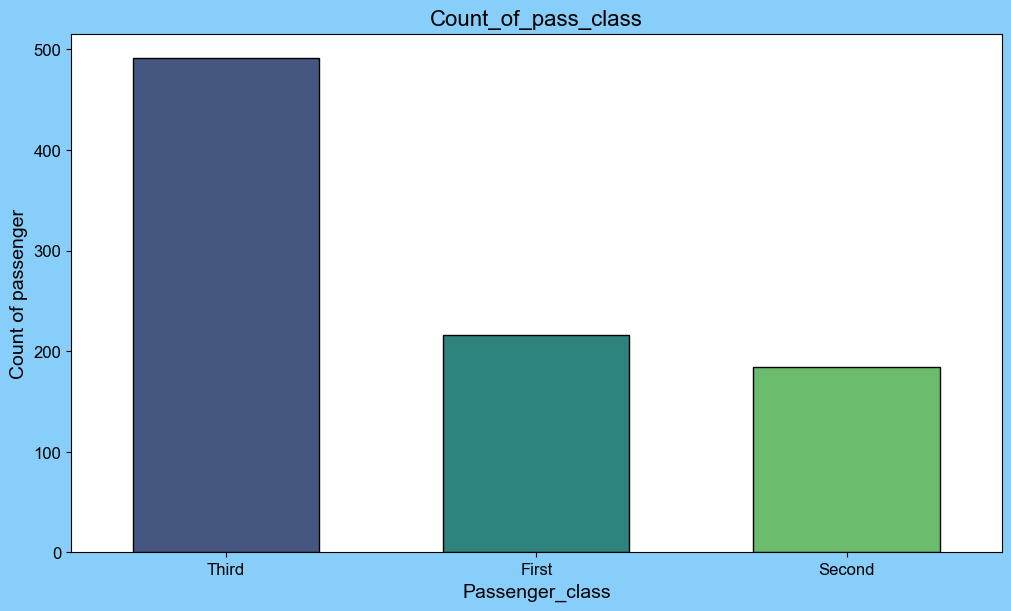

In [25]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.countplot(titanic_df,x='class',palette = 'viridis',width=0.6,edgecolor = 'black')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Count_of_pass_class', loc='center', fontsize='medium', size=16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.ylabel('Count of passenger', size=14)
plt.show()


# -- what is max/min/av age of pass

In [27]:
titanic_df['age'].min()

0.42

In [28]:
titanic_df['age'].max()

80.0

In [29]:
titanic_df['age'].mean()

29.69911764705882

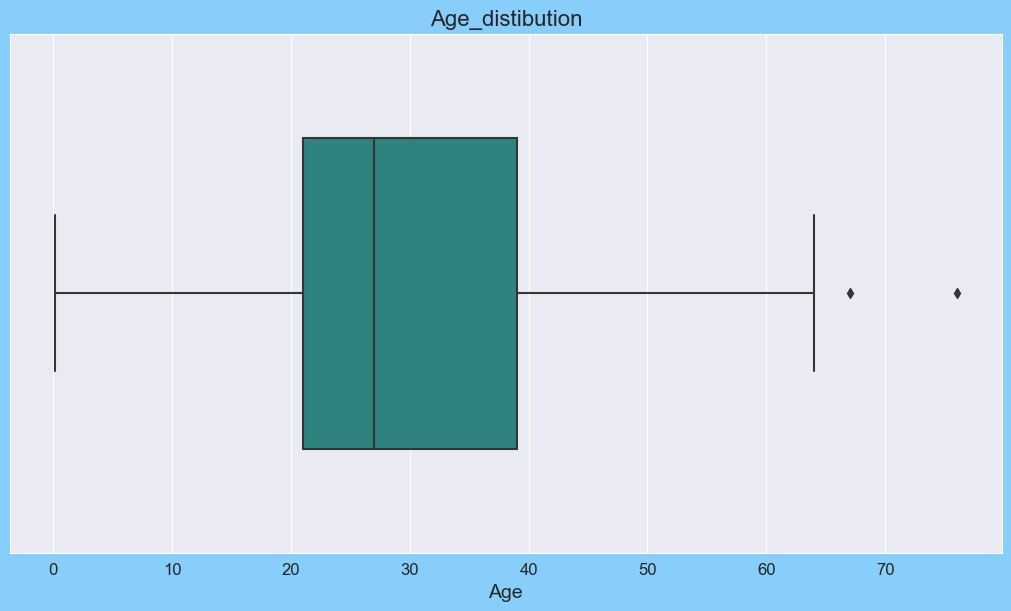

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor='lightskyblue',layout='constrained')
ax = sns.boxplot(titanic_df,x='Age',palette = 'viridis',width=0.6)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Age', size=14)
plt.yticks(size=12)
plt.show()

a:\anaconda3\envs\electro_car\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


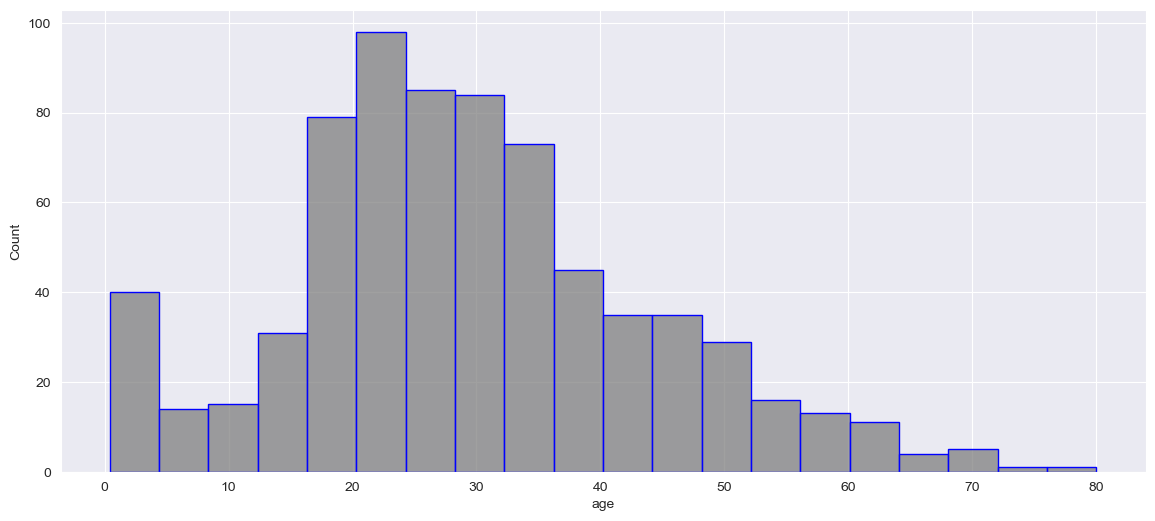

In [30]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.histplot(titanic_df['age'],color = 'grey',edgecolor= 'blue')
plt.show()

# -- what is max/min/av age of pass for each class

In [31]:
titanic_df.groupby(by='class')['age'].min()

class
First     0.92
Second    0.67
Third     0.42
Name: age, dtype: float64

In [32]:
titanic_df.groupby(by='class')['age'].max()

class
First     80.0
Second    70.0
Third     74.0
Name: age, dtype: float64

In [33]:
titanic_df.groupby(by='class')['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

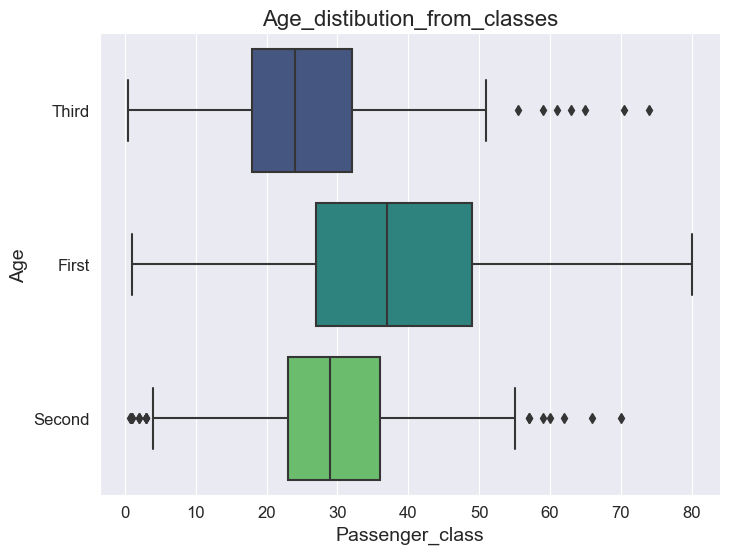

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(titanic_df,x='age',y='class',palette = 'viridis')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Age_distibution_from_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.ylabel('Age', size=14)
plt.xlabel('Passenger_class', size=14)
plt.yticks(size=12)
plt.show()

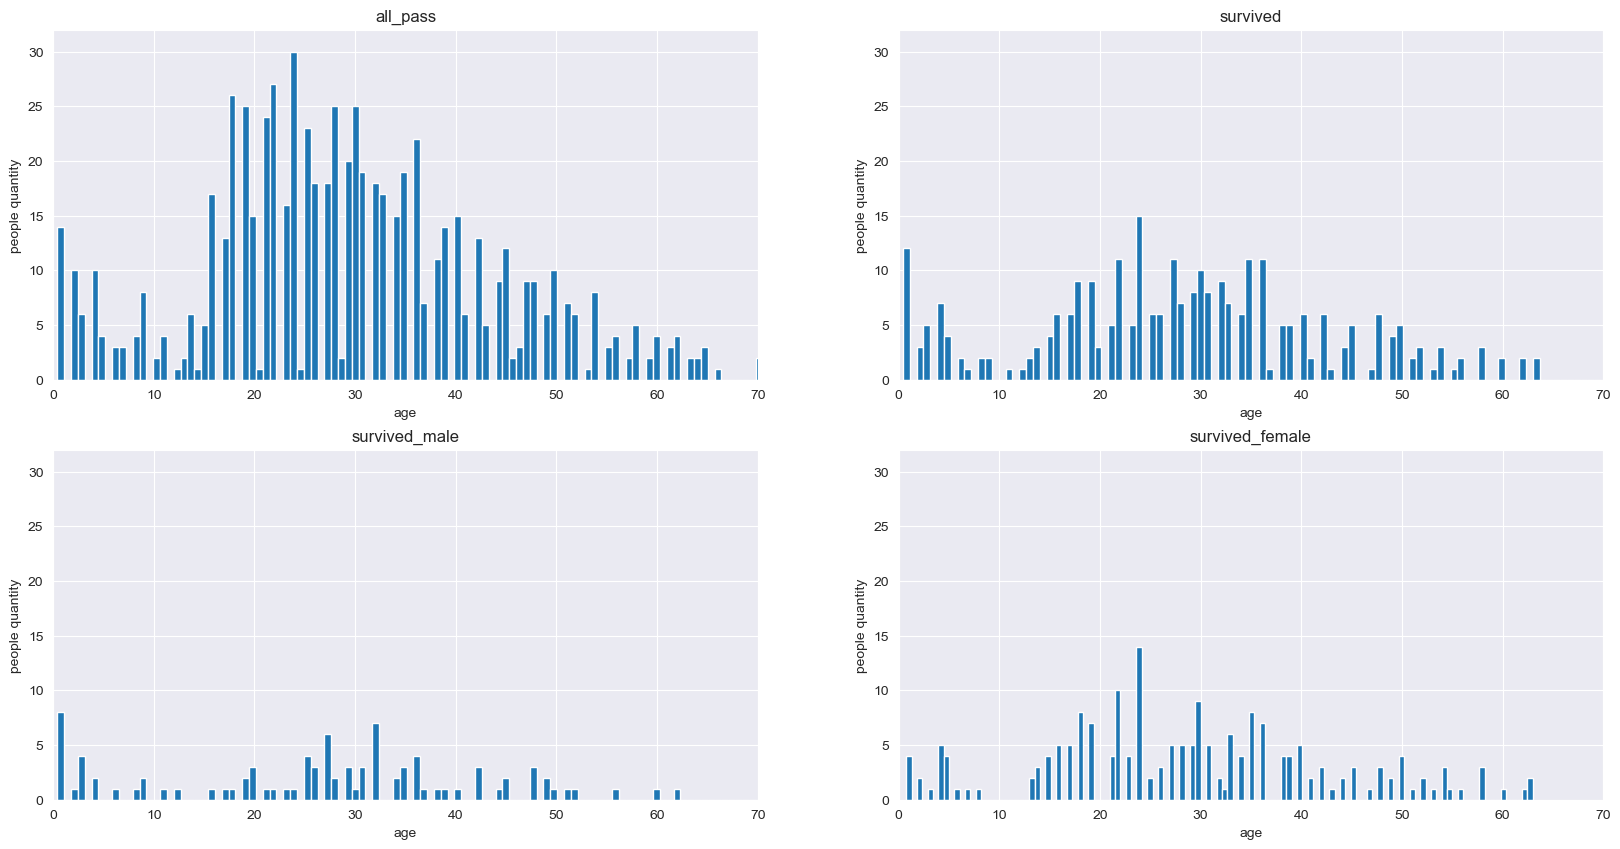

In [108]:
from collections import Counter

#diff group of pass
survivors = titanic_df.loc[(titanic_df['survived'] == 1)]
male_survivors = titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1))]
female_survivors = titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1))]

#age quantity
num_of_ages = len(dict(Counter(survivors['age'])).keys())

#vizualize
fig, axs = plt.subplots(2,2,figsize=(20, 10))
# fig.set_figwidth(20)
# fig.set_figheight(10)
names = [['all_pass', 'survived'], ['survived_male', 'survived_female']]
for i, surv in enumerate([[titanic_df, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('age')
        axs[i][j].set_ylabel('people quantity')
        axs[i][j].set_ylim(0,32)
        axs[i][j].set_xlim(0,70)
plt.show()

# -- survived children distibution

In [111]:
children = titanic_df.loc[((titanic_df['age'] < np.float64(18.0)) & (titanic_df['age'] > 0))]
survivors_children = titanic_df.loc[((titanic_df['age'] < np.float64(18.0)) & (titanic_df['survived'] == 1) & (titanic_df['age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')

Пасажиров до 18 лет спаслось 53.98%


<Axes: >

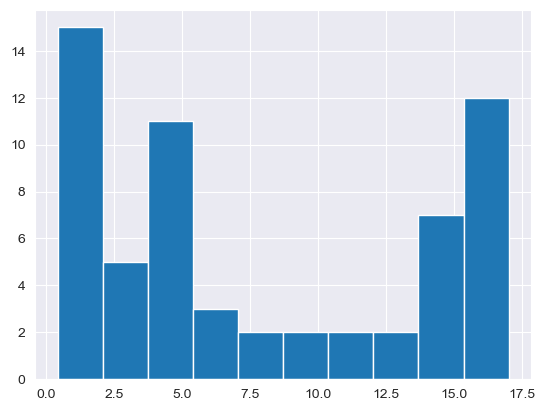

In [113]:
titanic_df.loc[((titanic_df['survived'] == 1) & (titanic_df['age'] > 0) & (titanic_df['age'] < 18))].age.hist()

# -- name analysis

# -- how many male/female was on ship

In [52]:
titanic_df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

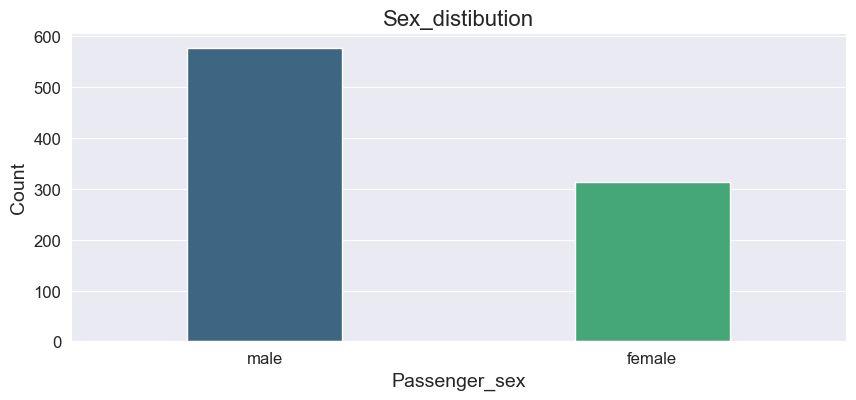

In [53]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='sex',palette = 'viridis',width=0.4)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_sex', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- how many male/female of each class was on the ship

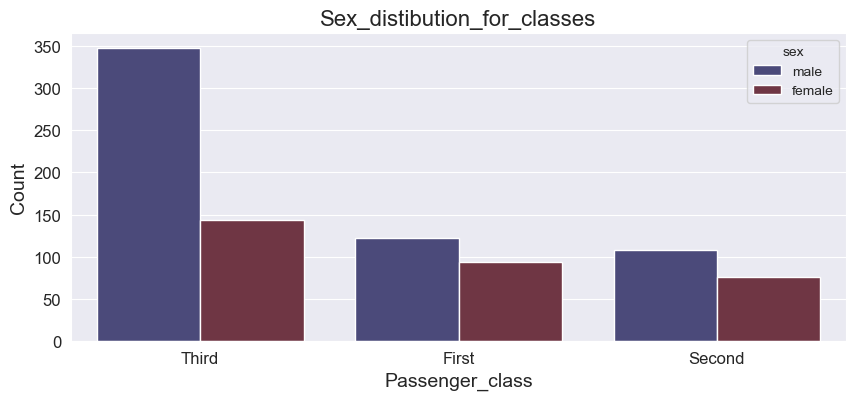

In [60]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(titanic_df,x='class',hue='sex',palette = 'icefire')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what percent of surv from male / female

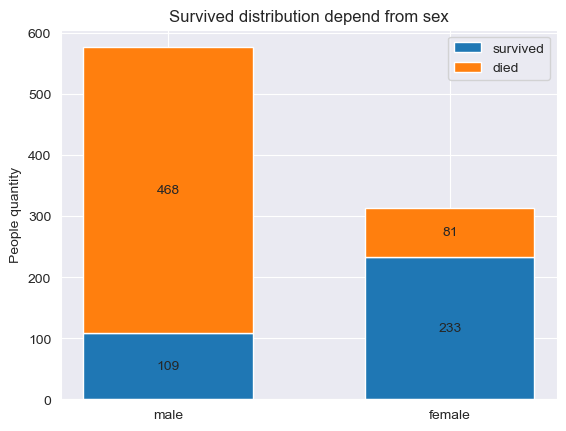

In [74]:
# full quantity and quantity of male/ female
males_total = len(titanic_df.loc[(titanic_df['sex'] == 'male')])
females_total = len(titanic_df.loc[(titanic_df['sex'] == 'female')])
males_survived = len(titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1))])
females_survived = len(titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1))])
males_unsurvived = len(titanic_df.loc[((titanic_df['sex'] == 'male') & (titanic_df['survived'] == 0))])
females_unsurvived = len(titanic_df.loc[((titanic_df['sex'] == 'female') & (titanic_df['survived'] == 0))])

#vizualize
survivors_counts = {
    'survived': [males_survived, females_survived],
    'died': [males_unsurvived, females_unsurvived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('male', 'female'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Survived distribution depend from sex')
ax.set_ylabel('People quantity')
ax.legend()
plt.show()

In [80]:
print(f'''survived male: {round(males_survived*100/males_total, 2)}%
survived female: {round(females_survived*100/females_total, 2)}%''')

survived male: 18.89%
survived female: 74.2%


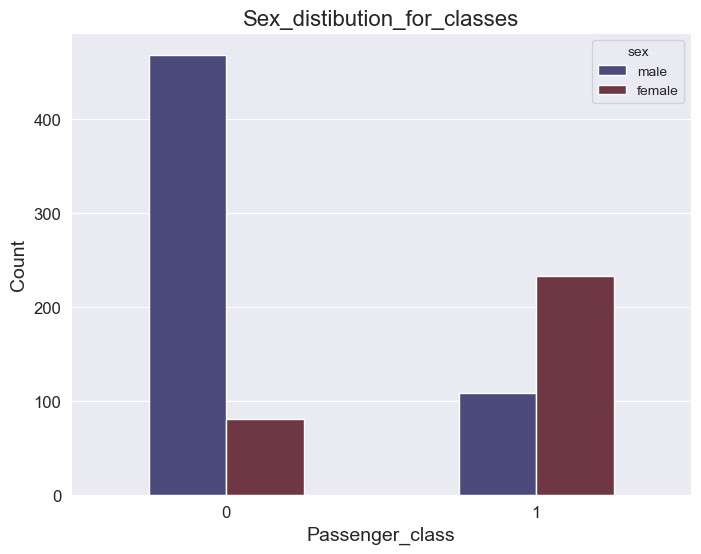

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(titanic_df,x='survived',hue = 'sex',palette = 'icefire', width=0.5)
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

# -- what precent of surv from each class

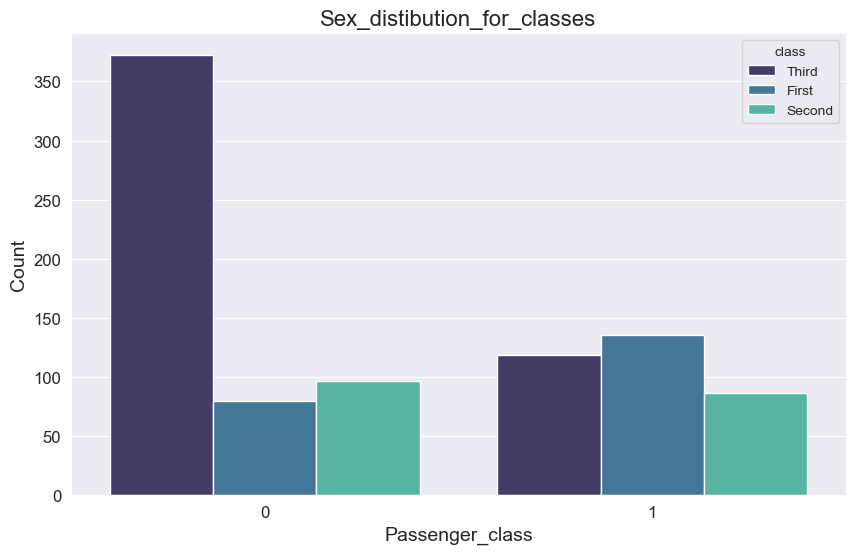

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(titanic_df,x='survived',hue='class',palette = 'mako')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Passenger_class', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

In [87]:
titanic_df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


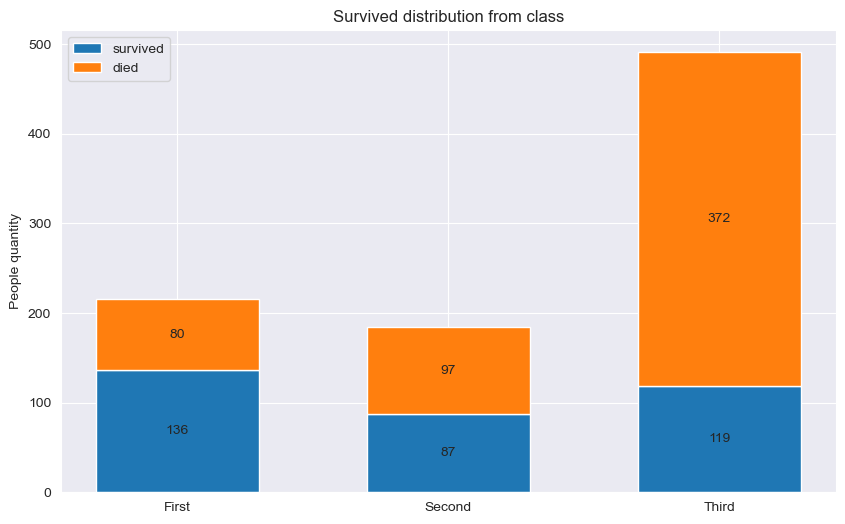

In [93]:
# full quantity and quantity of class
first_total = len(titanic_df.loc[(titanic_df['class'] == 'First')])
second_total = len(titanic_df.loc[(titanic_df['class'] == 'Second')])
third_total = len(titanic_df.loc[(titanic_df['class'] == 'Third')])
first_survived = len(titanic_df.loc[((titanic_df['class'] == 'First') & (titanic_df['survived'] == 1))])
second_survived = len(titanic_df.loc[((titanic_df['class'] == 'Second') & (titanic_df['survived'] == 1))])
third_survived = len(titanic_df.loc[((titanic_df['class'] == 'Third') & (titanic_df['survived'] == 1))])

#vizualize
survivors_counts = {
    'survived': [first_survived, second_survived, third_survived],
    'died': [first_total-first_survived, second_total-second_survived, third_total-third_survived]
}

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('First', 'Second', 'Third'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Survived distribution from class')
ax.set_ylabel('People quantity')
ax.legend()
plt.show()

In [95]:
#percentage
print(f'''survived_1_class: {round(first_survived*100/first_total, 2)}%
survived_2_class: {round(second_survived*100/second_total, 2)}%
survived_3_class: {round(third_survived*100/third_total, 2)}%
''')

survived_1_class: 62.96%
survived_2_class: 47.28%
survived_3_class: 24.24%



# -- how many pass of each emb place was on the ship

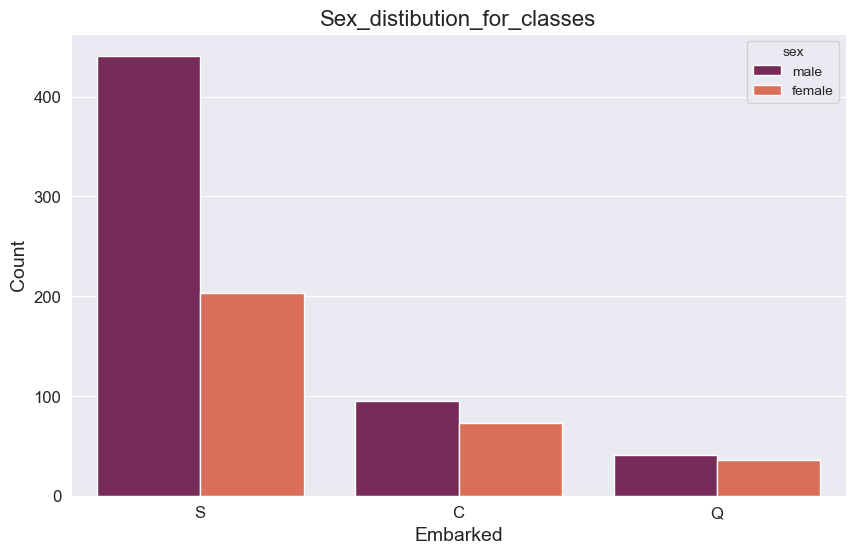

In [77]:
# C : Cherbourg, Q : Queenstown, S : Southampton

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(titanic_df,x='embarked',hue='sex',palette = 'rocket')
#style of diagram
sns.set_style("darkgrid")
ax.set_title('Sex_distibution_for_classes', loc='center', fontsize='medium',size = 16)
plt.xticks(size=12)
plt.xlabel('Embarked', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.show()

In [78]:
titanic_df.isna().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64